In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


<AxesSubplot:>

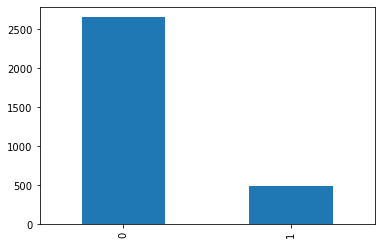

In [3]:
df.Churn.value_counts().plot(kind='bar')

In [4]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.85      0.41      0.56        99

    accuracy                           0.90       630
   macro avg       0.88      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630



C:\Users\91829\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
y_train.value_counts()

0    2124
1     396
Name: Churn, dtype: int64

In [8]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_train_rus.value_counts()

0    396
1    396
Name: Churn, dtype: int64

In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_rus,y_train_rus)

y_pred_rus = model.predict(X_test)
report = classification_report(y_test,y_pred_rus)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       531
           1       0.45      0.86      0.59        99

    accuracy                           0.82       630
   macro avg       0.71      0.83      0.74       630
weighted avg       0.89      0.82      0.84       630



In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

0    2124
1    2124
Name: Churn, dtype: int64

In [14]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_smote, y_train_smote)

y_pred_smote = model.predict(X_test)
report = classification_report(y_test, y_pred_smote)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.44      0.85      0.58        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.88      0.81      0.83       630



In [15]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_tomek, y_tomek = smt.fit_resample(X_train, y_train)
y_tomek.value_counts()

0    2091
1    2091
Name: Churn, dtype: int64

In [16]:
model = LogisticRegression(max_iter=2000)
model.fit(X_tomek, y_tomek)

y_pred_tomek = model.predict(X_test)
report = classification_report(y_test, y_pred_tomek)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.45      0.86      0.59        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.89      0.81      0.83       630

